<a href="https://colab.research.google.com/github/karthikpuranik11/FIRE2021/blob/main/Kannada/ULMFiT_Kannada_transliterated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
train1=pd.read_csv('/content/kan_final.csv', engine='python')
train1

,Unnamed: 0,Unnamed: 0.1,text,category,trans,translate
0,0,0,ಒಂದು ದೇಶದ ಮುಂದುವರಿಯುವುದು ಅದರ ಆರ್ಥಿಕ ಸ್ಥಿತಿಯನ್ನ...,Negative,ಒಂದು ದೇಶದ ಮುಂದುವರಿಯುವುದು ಅದರ ಆರ್ಥಿಕ ಸ್ಥಿತಿಯನ್ನ...,The progress of a country does not depend on i...
1,1,1,ಕನ್ನಡದಲ್ಲಿ ಡೈಲಿ ಟೆಕ್ ಅಪ್ಡೇಟ್ಸ್ ಪಡೆಯಲು ಸಬ್ಸ್ಕ್ರ...,Positive,ಕನ್ನಡದಲ್ಲಿ ಡೈಲಿ ಟೆಕ್ ಅಪ್ಡೇಟ್ಸ್ ಪಡೆಯಲು ಸಬ್ಸ್ಕ್ರ...,Subscribe to our channel for Daily Tech update...
2,2,2,Super sar song,not-Kannada,ಸೂಪರ್ ಸರ್ ಸಾಂಗ್,Superb song\n
3,3,3,Tiktokers present situation... nನೋಡುವವರು ಯಾರು ...,Negative,ಟಿಕ್ಚೋಕರ್ಸ್ ಪೆರೆಂಟ್ ಸಿಟ್ಯೂಶನ್... ನ್ನೋಡುವವರು ಯಾ...,Tik Chockers' Parent Status: Who's watching ou...
4,4,4,Super ಸಾಂಗ್ ವೆರಿ ನೈಸ್....,Positive,ಸೂಪರ್ ಸಾಂಗ್ ವೆರಿ ನೈಸ್....,The song is very peppy.\n
...,...,...,...,...,...,...
6207,6207,6207,@A.R.W tumbad tanhaji andhadhun aise bahot h...,not-Kannada,@ಏ.ರ್.ಎ ತಂಬದ್ ತಂಜಾಜಿ ಅಂಧಧುನ್ ಐಸ್ಡ್ ಬಹತ್ ಹೈ ಪ್ರ...,"@ arra _ tambad, tanjaji, Andhadhun, aisd baat..."
6208,6208,6208,പൊളി ഡാൻസ്🥰 രക്ഷിത് ഷെട്ടി മാസ്സ്,not-Kannada,പൊളി ഡാൻസ്🥰 രക്ഷിത് ഷെട്ടി മാസ്സ്,(in Korean)\n
6209,6209,6209,Bro...nNeen este Roast madudru...China ne beku...,Negative,ಬ್ರೋ...ನ್ಯೂನ್ ಎಸ್ಟ್ ರೋಸ್ಟ್ ಮಾಡುದ್ರು...ಚೀನಾ ನೇ ...,""""" ""Bro..."" """" """" """" """" """" """" """" ""\n"
6210,6210,6210,ಕೌಶಲ್ಯ ಇದ್ದವರ ಸಂಖ್ಯೆ ಕಡಿಮೆ ಇಲ್ಲ ಸರ್ ತುಂಬಾ ಪ್ರತ...,Positive,ಕೌಶಲ್ಯ ಇದ್ದವರ ಸಂಖ್ಯೆ ಕಡಿಮೆ ಇಲ್ಲ ಸರ್ ತುಂಬಾ ಪ್ರತ...,There is no dearth of talented people in our c...


In [3]:
for i in range(len(train1)):
  train1['trans'][i]=train1['trans'][i][8:-2]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [5]:
for i in range(len(train1)):
  if train1['category'][i]=='not-Kannada':
    train1['trans'][i]='NaN'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
train=pd.DataFrame(columns=['category','text'])
train['category']=train1['category'].append(train1['category'])
train['text']=train1['text'].append(train1['trans'])
train

,category,text
0,Negative,ಒಂದು ದೇಶದ ಮುಂದುವರಿಯುವುದು ಅದರ ಆರ್ಥಿಕ ಸ್ಥಿತಿಯನ್ನ...
1,Positive,ಕನ್ನಡದಲ್ಲಿ ಡೈಲಿ ಟೆಕ್ ಅಪ್ಡೇಟ್ಸ್ ಪಡೆಯಲು ಸಬ್ಸ್ಕ್ರ...
2,not-Kannada,Super sar song
3,Negative,Tiktokers present situation... nನೋಡುವವರು ಯಾರು ...
4,Positive,Super ಸಾಂಗ್ ವೆರಿ ನೈಸ್....
...,...,...
6207,not-Kannada,NaN
6208,not-Kannada,NaN
6209,Negative,್ಯೂನ್ ಎಸ್ಟ್ ರೋಸ್ಟ್ ಮಾಡುದ್ರು...ಚೀನಾ ನೇ ಬೇಕು ಅಂತ...
6210,Positive,ದ್ದವರ ಸಂಖ್ಯೆ ಕಡಿಮೆ ಇಲ್ಲ ಸರ್ ತುಂಬಾ ಪ್ರತಿಭಾವಂತರಿ...


In [7]:
train=train.dropna()

In [8]:
val=pd.read_csv('/content/kannada_sentiment_full_test_withlabels.tsv', sep="\t")
#val['tweet']=val['text']
#val=val.drop(columns=['Unnamed: 2','text'])
val

,id,text,category
0,Kan_1,ಈ ಹಾಡನ್ನು ಹಾಡಿದ ವಿಜಯ ಪ್ರಕಾಶ voice ಯಾರಿಗೆಲ್ಲಾ ಇ...,Positive
1,Kan_2,Jai D Boss,unknown state
2,Kan_3,Signature move,not-Kannada
3,Kan_4,Super song bro,Positive
4,Kan_5,Wow Super agi helidira sir,Positive
...,...,...,...
763,Kan_764,Thu thukali trailer,unknown state
764,Kan_765,Siri gannadam galge haakbitallapa Thu yaro ni...,Negative
765,Kan_766,ನಾವೇನಾದರು ಸ್ವಾಬಿಮಾನಿಯಾಗಿ ಬದುಕನ್ನು ಕಟ್ಟಿಕೊಳ್ಳಲು...,Positive
766,Kan_767,ದಿಯಾ ನೀವು ಸೋಷಿಯಲ್ ಮೀಡಿಯಾ ಅಲ್ಲಿ ಕಾಣ್ತಿಲ್ಲ.nದಯವಿ...,unknown state


In [9]:
df=train.filter(['category','text'], axis=1)
df_test=val.filter(['category','text'],axis=1)

In [10]:
#removing @ and #
def punc(df):
    df['text'] = df['text'].str.replace('[#@()]','')
    print(df)

In [11]:
punc(df)
punc(df_test)

            category                                               text
0           Negative  ಒಂದು ದೇಶದ ಮುಂದುವರಿಯುವುದು ಅದರ ಆರ್ಥಿಕ ಸ್ಥಿತಿಯನ್ನ...
1           Positive  ಕನ್ನಡದಲ್ಲಿ ಡೈಲಿ ಟೆಕ್ ಅಪ್ಡೇಟ್ಸ್ ಪಡೆಯಲು ಸಬ್ಸ್ಕ್ರ...
2        not-Kannada                                     Super sar song
3           Negative  Tiktokers present situation... nನೋಡುವವರು ಯಾರು ...
4           Positive                          Super ಸಾಂಗ್ ವೆರಿ ನೈಸ್....
...              ...                                                ...
6207     not-Kannada                                                NaN
6208     not-Kannada                                                NaN
6209        Negative  ್ಯೂನ್ ಎಸ್ಟ್ ರೋಸ್ಟ್ ಮಾಡುದ್ರು...ಚೀನಾ ನೇ ಬೇಕು ಅಂತ...
6210        Positive  ದ್ದವರ ಸಂಖ್ಯೆ ಕಡಿಮೆ ಇಲ್ಲ ಸರ್ ತುಂಬಾ ಪ್ರತಿಭಾವಂತರಿ...
6211  Mixed feelings                                                ್ಯೂ

[12424 rows x 2 columns]
           category                                               text
0          Positive  ಈ ಹಾಡನ್ನು ಹಾಡಿದ ವಿ

In [12]:
import fastai
from fastai import *
from fastai.text import * 
from functools import partial
import io
import os

In [13]:
# Language model data
data_lm = TextLMDataBunch.from_df(train_df = df, valid_df = df_test, path = "")

/usr/local/lib/python3.7/dist-packages/fastai/core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(a, dtype=dtype, **kwargs)


In [14]:
data_lm.show_batch

<bound method DataBunch.show_batch of TextLMDataBunch;

Train: LabelList (12424 items)
x: LMTextList
xxbos ಒಂದು ದೇಶದ ಮುಂದುವರಿಯುವುದು ಅದರ ಆರ್ಥಿಕ ಸ್ಥಿತಿಯನ್ನು ಅವಲಂಬಿಸುವುದಿಲ್ಲ . ಅವರು ಮಾನವೀಯತೆಯಲ್ಲಿ ಎಷ್ಟು ಸಮರ್ಥರು ಎನ್ನುವುದನ್ನು ಅವಲಂಬಿಸಿದೆ . ಭಾರತದಲ್ಲಿ ಅನಕ್ಷರತೆ ಇದೆ ಆ ಅನಕ್ಷರಸ್ಥರನ್ನು ಅವರ xxunk,xxbos ಕನ್ನಡದಲ್ಲಿ ಡೈಲಿ ಟೆಕ್ ಅಪ್ಡೇಟ್ಸ್ ಪಡೆಯಲು ಸಬ್ಸ್ಕ್ರೈಬ್ ಮಾಡಿ ನಮ್ಮ xxunk,xxbos xxmaj super sar song,xxbos xxmaj tiktokers present xxunk ... xxunk ಯಾರು ನಮ್ಮ xxunk,xxbos xxmaj super ಸಾಂಗ್ ವೆರಿ ನೈಸ್ xxrep 4 .
y: LMLabelList
,,,,
Path: .;

Valid: LabelList (768 items)
x: LMTextList
xxbos ಈ ಹಾಡನ್ನು xxunk ವಿಜಯ xxunk voice xxunk xxunk ಲೈಕ್ xxunk ಮಾತಿನ ಬಜಾರು ಸುದ್ದಿ ಸಾರಿದೆ xxrep 10 .,xxbos xxmaj jai d xxmaj boss,xxbos xxmaj signature move,xxbos xxmaj super song bro,xxbos xxmaj wow xxmaj super agi helidira sir
y: LMLabelList
,,,,
Path: .;

Test: None>

In [15]:
#loading AWD_LSTM language model
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 3.98E-02
Min loss divided by 10: 1.58E-01


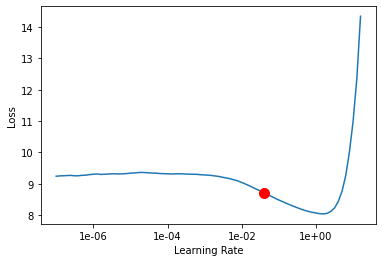

In [16]:
#to find the optimal learning rate
learn.lr_find(start_lr=1e-8, end_lr=1e2)
learn.recorder.plot(suggestion = True)


In [17]:
#fitting the data
learn.fit_one_cycle(2, 5e-2)
learn.unfreeze()

epoch,train_loss,valid_loss,accuracy,time
0,6.894692,4.818703,0.306027,00:04
1,5.698714,4.670720,0.312277,00:04


In [18]:
learn.fit_one_cycle(3, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.923152,4.783306,0.301004,00:06
1,4.387095,4.485410,0.326004,00:06
2,3.715882,4.554893,0.318304,00:06


In [19]:
learn.freeze_to(-1)
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 2.75E-02
Min loss divided by 10: 3.98E-03


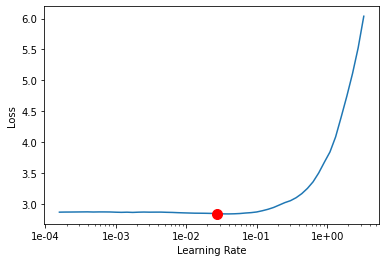

In [20]:
learn.recorder.plot(skip_start=40, suggestion=True)

In [21]:
learn.fit_one_cycle(3, slice(1e-2/(2.6**4), 1e-2))

epoch,train_loss,valid_loss,accuracy,time
0,2.916513,4.558271,0.328795,00:05
1,2.746861,4.631171,0.318638,00:05
2,2.554369,4.636232,0.319085,00:05


In [22]:
learn.freeze_to(-2)
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 6.31E-03
Min loss divided by 10: 4.37E-04


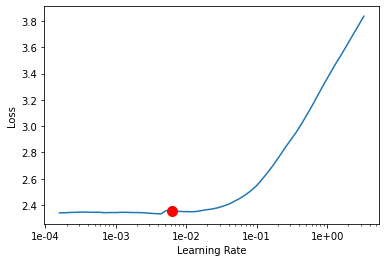

In [23]:
learn.recorder.plot(skip_start=40, suggestion=True)

In [24]:
learn.fit_one_cycle(3, slice(6e-3/(2.6**4), 6e-3))

epoch,train_loss,valid_loss,accuracy,time
0,2.367939,4.762482,0.313058,00:05
1,2.282265,4.848336,0.307366,00:05
2,2.156450,4.854176,0.307143,00:05


In [25]:
#save the encoder model
learn.save_encoder('my_encoder')

In [26]:
# Classifier model data
data_clas = TextClasDataBunch.from_df(path = "", train_df = df, valid_df = df_test, vocab=data_lm.train_ds.vocab, bs=32)

/usr/local/lib/python3.7/dist-packages/fastai/core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(a, dtype=dtype, **kwargs)


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [27]:
#building classifier
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5, metrics=[accuracy, FBeta(beta=1)])

#loading the saved encoder
learn.load_encoder('my_encoder')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (12424 items)
x: TextList
xxbos ಒಂದು ದೇಶದ ಮುಂದುವರಿಯುವುದು ಅದರ ಆರ್ಥಿಕ ಸ್ಥಿತಿಯನ್ನು ಅವಲಂಬಿಸುವುದಿಲ್ಲ . ಅವರು ಮಾನವೀಯತೆಯಲ್ಲಿ ಎಷ್ಟು ಸಮರ್ಥರು ಎನ್ನುವುದನ್ನು ಅವಲಂಬಿಸಿದೆ . ಭಾರತದಲ್ಲಿ ಅನಕ್ಷರತೆ ಇದೆ ಆ ಅನಕ್ಷರಸ್ಥರನ್ನು ಅವರ xxunk,xxbos ಕನ್ನಡದಲ್ಲಿ ಡೈಲಿ ಟೆಕ್ ಅಪ್ಡೇಟ್ಸ್ ಪಡೆಯಲು ಸಬ್ಸ್ಕ್ರೈಬ್ ಮಾಡಿ ನಮ್ಮ xxunk,xxbos xxmaj super sar song,xxbos xxmaj tiktokers present xxunk ... xxunk ಯಾರು ನಮ್ಮ xxunk,xxbos xxmaj super ಸಾಂಗ್ ವೆರಿ ನೈಸ್ xxrep 4 .
y: CategoryList
Negative,Positive,not-Kannada,Negative,Positive
Path: .;

Valid: LabelList (768 items)
x: TextList
xxbos ಈ ಹಾಡನ್ನು xxunk ವಿಜಯ xxunk voice xxunk xxunk ಲೈಕ್ xxunk ಮಾತಿನ ಬಜಾರು ಸುದ್ದಿ ಸಾರಿದೆ xxrep 10 .,xxbos xxmaj jai d xxmaj boss,xxbos xxmaj signature move,xxbos xxmaj super song bro,xxbos xxmaj wow xxmaj super agi helidira sir
y: CategoryList
Positive,unknown state,not-Kannada,Positive,Positive
Path: .;

Test: None, model=SequentialRNN(
  (0): MultiBatchEncoder(
    (module): AWD_LSTM(
      (encoder): Embedding(9824

epoch,train_loss,valid_loss,accuracy,f_beta,time


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.32E-06
Min loss divided by 10: 1.74E-02


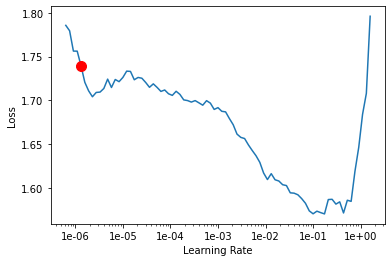

In [28]:
learn.lr_find()
learn.recorder.plot(suggestion=True)


In [29]:
learn.fit_one_cycle(3, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,1.197722,1.076819,0.578125,0.368810,00:05
1,1.122506,1.036079,0.567708,0.000000,00:05
2,1.075769,1.025404,0.595052,0.000000,00:05


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/usr/local/lib/python3.7/dist-packages/nu

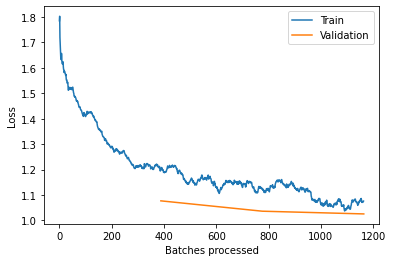

In [30]:
learn.recorder.plot_losses()

epoch,train_loss,valid_loss,accuracy,f_beta,time


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.91E-06
Min loss divided by 10: 3.98E-07


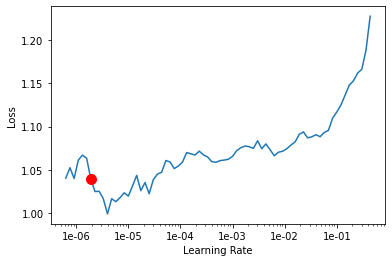

In [31]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [32]:
learn.freeze_to(-2) # unfreeze last 2 layers
learn.fit_one_cycle(2, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,1.088135,1.022696,0.614583,0.429376,00:05
1,0.984925,1.000533,0.621094,0.000000,00:06


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/usr/local/lib/python3.7/dist-packages/nu

epoch,train_loss,valid_loss,accuracy,f_beta,time


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.74E-05
Min loss divided by 10: 6.31E-08


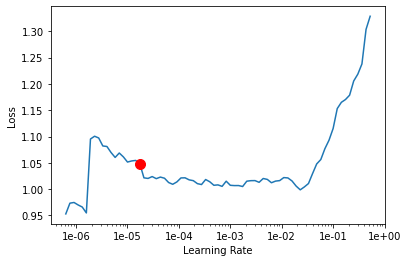

In [33]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [34]:
learn.freeze_to(-3)
learn.fit_one_cycle(2, slice(5.3e-3/(2.6**4),5.31e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,1.037462,1.032436,0.606771,0.420759,00:09
1,0.904892,0.980393,0.627604,0.477134,00:10


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/usr/local/lib/python3.7/dist-packages/nu

In [35]:
learn.freeze_to(-4) # unfreeze last 4 layers
learn.fit_one_cycle(2, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))
learn.freeze_to(-5) # unfreeze last 5 layers
learn.fit_one_cycle(2, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

# Unfreezing all the layers and training
learn.unfreeze() # unfreze all
learn.fit_one_cycle(3, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.839850,0.964880,0.630208,0.469122,00:13
1,0.730975,1.015735,0.605469,0.462473,00:12


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/usr/local/lib/python3.7/dist-packages/nu

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.785429,1.045664,0.606771,0.467222,00:14
1,0.599110,1.097319,0.618490,0.493363,00:14


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/usr/local/lib/python3.7/dist-packages/nu

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.498935,1.133508,0.618490,0.476045,00:14
1,0.533962,1.186160,0.609375,0.477839,00:13
2,0.437643,1.203204,0.608073,0.485414,00:13


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/usr/local/lib/python3.7/dist-packages/nu

In [36]:
#getting the predictions
preds, targets = learn.get_preds()
predictions = np.argmax(preds, axis = 1)

In [37]:
pd.crosstab(predictions, targets)

col_0,0,1,2,3,4
row_0,,,,,
0,9,11,16,0,4
1,13,99,34,2,2
2,27,38,276,32,22
3,3,2,35,61,12
4,13,7,13,15,22


In [38]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
cm=confusion_matrix(predictions,targets)
print(cm)
score = accuracy_score( predictions, targets)
print(score)

[[  9  11  16   0   4]
 [ 13  99  34   2   2]
 [ 27  38 276  32  22]
 [  3   2  35  61  12]
 [ 13   7  13  15  22]]
0.6080729166666666


In [39]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(predictions,targets, zero_division=0, digits=4))

              precision    recall  f1-score   support

           0     0.1385    0.2250    0.1714        40
           1     0.6306    0.6600    0.6450       150
           2     0.7380    0.6987    0.7178       395
           3     0.5545    0.5398    0.5471       113
           4     0.3548    0.3143    0.3333        70

    accuracy                         0.6081       768
   macro avg     0.4833    0.4876    0.4829       768
weighted avg     0.6239    0.6081    0.6150       768

